# **Average power**  

**Author :** **Mitra Peivandi**  

**Gmail :** miti1383@gmail.com  

**Fall 2024**

## **Outline :**
1. Description  

2. Calculate the average power 
   1. calculate average power with simple mathematics 
   2. Draw the circuit with schemdraw
   3. Calculate average power with PySpice

3. Plot with PySpice

4. RC circuit
   1. Add resistor
      1. Analysis the effect of changing the resistance in current as a function of time diagram
   2. Add capacitor
      1. Plot the effect of capacitor on current as a function of time
      2. How a Capacitor Affects the Circuit
5. Diagram of power
   1. Draw power as a function of time for resistor
   2. Analyzing the resistance power
   3. Draw power as a function of time for capacitor
   4. Analyze power as a function of time for capacitor
   5. Analyze power as a function of time for current source
6. Average power in window of length W
   1. Plot average power for the circuit including resistor and current source
   2. Analyze the diagram of average power in window of length T/10 
7. Conclusion
8. Sources   


## **Description**  

**Average power** definition states the ratio of **total work done** and **total time** taken. It is denoted by **P**. The SI unit of measurement for average power is **Watt**.

The average power is obtained from the following formula:

$$P_{avg} =\frac{1}{T} \int_0^T P (t)  dt=\frac{1}{T} \int_0^T i(t) \cdot v(t)  dt$$

Instantaneous power is obtained from the formula below :

$$ P = V \cdot I $$

Now, let's calculate the average power for the requested chart:

## **Calculate the average power**  

### **calculate average power with simple mathematics:** 

**step1 : find the piecewise function**

The current \( i(t) \) is defined as follows:

1. From 0 to 6 seconds: \( i(t) = t \)
2. From 6 to 8 seconds: \( i(t) = 0 \)
3. From 8 to 14 seconds: \( i(t) = (t - 8) \)
4. From 14 to 15 seconds: \( i(t) = 0 \)

This piecewise function describes how the current varies over time.Let's calculate the integral for each segment:

**step2 : find each section integral**

we know that :
$$
P = R.I^2
$$
$$
P_{avg} =\frac{1}{T} \int_0^T P (t)  dt
$$
so :
 1. From 0 to 6 seconds

$$
\int_{0}^{6}R.t^2.dt = R\times \frac{t^3}{3} = R\times72
$$


 2. From 6 to 8 seconds

$$
\int_{6}^{8}R.0.dt = 0
$$

 3. From 8 to 14 seconds

$$
\int_{8}^{14}R.(t-8)^2 dt = 72\times R
$$

 4. From 14 to 15 seconds

$$
\int_{14}^{15}R.0.dt = 0
$$

**step3 : summing Up and Averaging**

$$
P_{avg} =\frac{1}{T} \int_0^T P (t)  dt =  \frac{1}{15}\times (72\times R+0+72\times R+0)=9.6\times R 
$$

So, the average power delivered by the current in the circuit is **($ 9.6 \times R $)** watts.



### **Draw the circuit with schemdraw:**

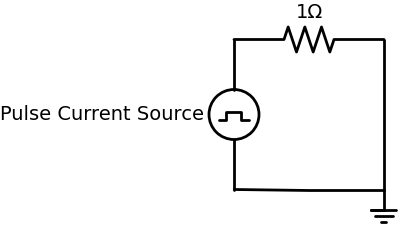

In [39]:
import schemdraw
import schemdraw.elements as elm

# Create a new drawing
with schemdraw.Drawing() as d:

    # Add the pulse current source
    S = d.add(elm.SourcePulse().label('Pulse Current Source', loc='top'))

    # Add a resistor in series
    R = d.add(elm.Resistor().right().label('1Ω'))

    # Add a line to separate elements
    d.add(elm.Line().down())

    # Add a capacitor in parallel
    d.push()  # Push to a new drawing level
    d.add(elm.Line().left())
    d.pop()  # Pop back to the original level

    # Add ground
    d.add(elm.Ground())


### **Calculate average power with PySpice**
We will see that the result for average power would be around 9.6 watt for 1 ohm resistor.

In [40]:
import matplotlib.pyplot as plt
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *
import numpy as np

# Create a new circuit
circuit = Circuit('Pulse Current Waveform')

# Define the pulse current source
pulse_current = circuit.PulseCurrentSource('pulse', 'n1', circuit.gnd, 
                                            initial_value=0@u_A,       # Start at 0A
                                            pulsed_value=-7@u_A,       # Peak at -7A
                                            delay_time=0@u_s,          # No delay
                                            rise_time=7@u_s,           # Rise time to peak (create slope)
                                            fall_time=0@u_s,           # Sharp fall after peak
                                            pulse_width=-1@u_s,        # Width of the top of the pulse
                                            period=8@u_s)              # Repeat after 8 seconds

# Define a resistor to complete the circuit
circuit.R(1, 'n1', circuit.gnd, 1@u_Ω)

# Simulate the circuit
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=0.01@u_s, end_time=15@u_s)

# Calculate the voltage across the resistor
voltage = np.array(analysis['n1'])

# Calculate the current through the resistor (Ohm's Law: I = V/R)
current = voltage / 1  # Resistor value is 1 ohm

# Calculate the instantaneous power (P = V * I)
power = voltage * current

# Calculate the average power
average_power = np.mean(power)

print(f'Average Power: {average_power:.2e} W')


Average Power: 9.59e+00 W


## **Plot with PySpice** 

Draw current as a function of time with Pulse Current Source

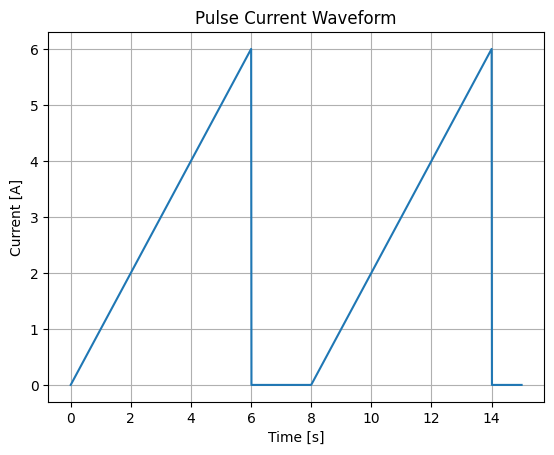

In [41]:
import matplotlib.pyplot as plt
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *

# Create a new circuit
circuit = Circuit('Pulse Current Waveform')

# Define the pulse current source
pulse_current = circuit.PulseCurrentSource('pulse', 'n1', circuit.gnd, 
                                            initial_value=0@u_A,       # Start at 0A
                                            pulsed_value=-7@u_A,       # Peak at 6A
                                            delay_time=0@u_s,          # No delay
                                            rise_time=7@u_s,           # Rise time to peak (create slope)
                                            fall_time=0@u_s,         # Sharp fall after peak
                                            pulse_width=-1@u_s,         # Width of the top of the pulse
                                            period=8@u_s)              # Repeat after 8 seconds

# Define a resistor to complete the circuit
circuit.R(1, 'n1', circuit.gnd, 1@u_Ω)

# Simulate the circuit
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=0.01@u_s, end_time=15@u_s)

# Plot the results
figure, axe = plt.subplots()
axe.plot(analysis.time, analysis['n1'])
axe.set_title('Pulse Current Waveform')
axe.set_xlabel('Time [s]')
axe.set_ylabel('Current [A]')
axe.grid()
plt.show()

## **RC circuit**

### **Add Resistor:**

**Analysis the effect of changing the resistance in current as a function of time diagram:**

A **pulse current source** is **independent** of the resistance in the circuit. It means that the current source will always deliver the specified current waveform regardless of the resistance connected to it.


### **Add Capacior :**
**Plot the effect of capacitor on current as a function of time:**

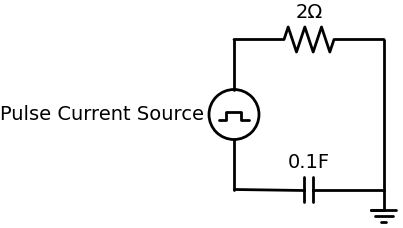

In [42]:
import schemdraw
import schemdraw.elements as elm

# Create a new drawing
with schemdraw.Drawing() as d:

    # Add the pulse current source
    S = d.add(elm.SourcePulse().label('Pulse Current Source', loc='top'))

    # Add a resistor in series
    R = d.add(elm.Resistor().right().label('2Ω'))

    # Add a line to separate elements
    d.add(elm.Line().down())

    # Add a capacitor in parallel
    d.push()  # Push to a new drawing level
    d.add(elm.Capacitor().left().label('0.1F'))  # Capacitor below
    d.pop()  # Pop back to the original level

    # Add ground
    d.add(elm.Ground())


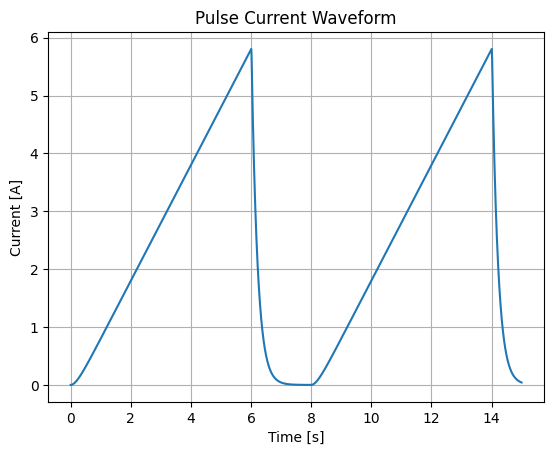

In [43]:
import matplotlib.pyplot as plt
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *

# Create a new circuit
circuit = Circuit('Pulse Current Waveform')

# Define the pulse current source
pulse_current = circuit.PulseCurrentSource('pulse', 'n1', circuit.gnd, 
                      initial_value=0@u_A,    # Start at 0A
                      pulsed_value=-7@u_A,    # Peak at 6A
                      delay_time=0@u_s,     # No delay
                      rise_time=7@u_s,      # Rise time to peak (create slope)
                      fall_time=0@u_s,     # Sharp fall after peak
                      pulse_width=-1@u_s,     # Width of the top of the pulse
                      period=8@u_s)       # Repeat after 8 seconds

# Define a resistor to complete the circuit
circuit.R(1, 'n1', circuit.gnd, 2@u_Ω)

# Add a capacitor in parallel
circuit.C(1, 'n1', circuit.gnd, 100000@u_uF) # 0.1 farad capacitor

# Simulate the circuit
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=0.01@u_s, end_time=15@u_s)

# Apply the ohm's law
current = analysis['n1']/2

# Plot the results
figure, axe = plt.subplots()
axe.plot(analysis.time, current)
axe.set_title('Pulse Current Waveform')
axe.set_xlabel('Time [s]')
axe.set_ylabel('Current [A]')
axe.grid()
plt.show()


### **How a Capacitor Affects the Circuit**  

- **Smoother Transition:** The rising and falling edges of the pulse will be less sharp because the capacitor will "smooth out" the transitions. The rise time and fall time of the pulse will be longer.   

- **Voltage Drop:** The capacitor will charge up during the positive portion of the pulse, causing a voltage drop across the resistor.  
 
- **Discharge:** During the negative portion of the pulse, the capacitor will discharge, causing a voltage increase across the resistor.

## **Diagram of power**  

### **Draw power as a function of time for resistor :**

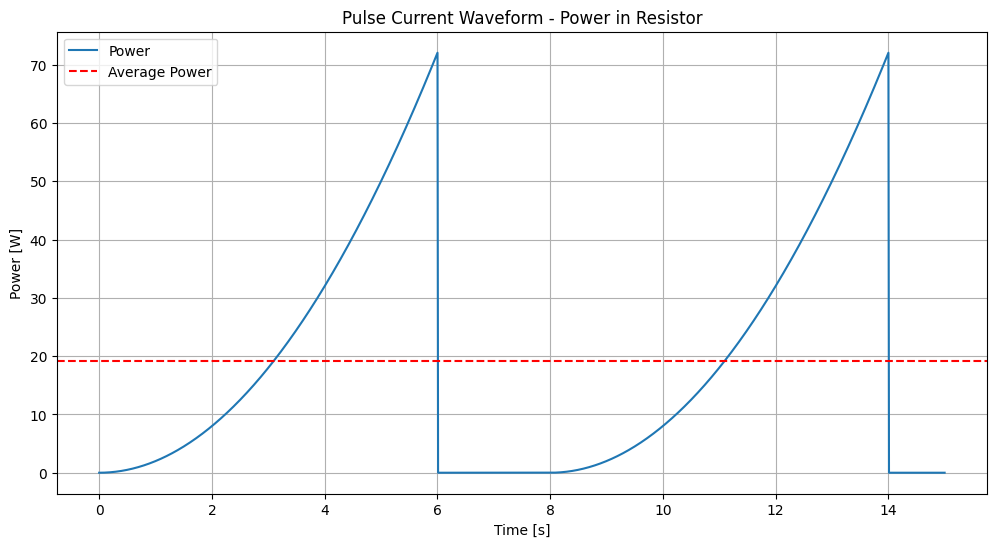

Average Power in the Resistor: 19.17 W


In [44]:
import matplotlib.pyplot as plt
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *
import numpy as np

# Create a new circuit
circuit = Circuit('Pulse Current Waveform')

# Define the pulse current source
pulse_current = circuit.PulseCurrentSource('pulse', 'n1', circuit.gnd, 
           initial_value=0@u_A,  # Start at 0A
           pulsed_value=-7@u_A,  # Peak at 6A
           delay_time=0@u_s,   # No delay
           rise_time=7@u_s,   # Rise time to peak (create slope)
           fall_time=0@u_s,   # Sharp fall after peak
           pulse_width=-1@u_s,   # Width of the top of the pulse
           period=8@u_s)    # Repeat after 8 seconds

# Define a resistor to complete the circuit
circuit.R(1, 'n1', circuit.gnd, 2@u_Ω)

# Simulate the circuit
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=0.01@u_s, end_time=15@u_s)

# Calculate the current through the resistor (using Ohm's Law)
current = analysis['n1'] / 2

# Calculate the power in the resistor
# P = R*I*I
power = current**2 * 2

# Calculate the average power
average_power = np.mean(power)

# Convert average_power to a numerical value
average_power_value = float(average_power)

# Plot the power 
plt.figure(figsize=(12, 6))
plt.plot(analysis.time, power, label='Power')
plt.xlabel('Time [s]')
plt.ylabel('Power [W]')
plt.title('Pulse Current Waveform - Power in Resistor')
plt.grid(True)

# Add a horizontal line for average power
plt.axhline(y=average_power_value, color='r', linestyle='--', label='Average Power')

plt.legend()
plt.show()

# Print the average power
print(f"Average Power in the Resistor: {average_power_value:.2f} W")


### **Analyzing the resistance power:**

The power is directly related to the square of the current ($ P=I^2\times R $). As the current increases, the power dissipation increases significantly and due to the power of two of the circuit current, a line similar to a parabola can be seen in the diagram.


### **Draw power as a function of time for capacitor :**

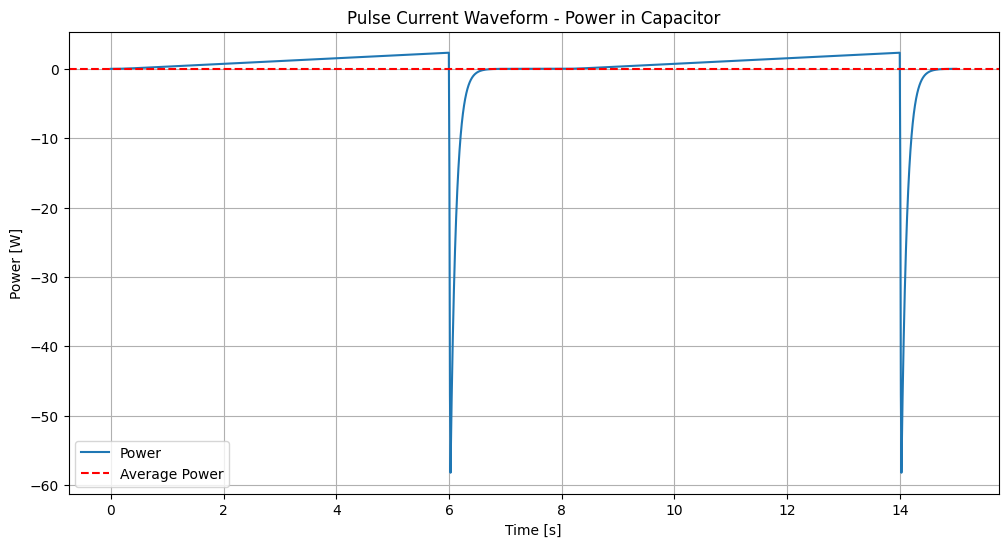

Average Power in the Capacitor: 0.00 W


In [45]:
import matplotlib.pyplot as plt
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *
import numpy as np

# Create a new circuit
circuit = Circuit('Pulse Current Waveform')

# Define the pulse current source
pulse_current = circuit.PulseCurrentSource('pulse', 'n1', circuit.gnd, 
           initial_value=0@u_A,  # Start at 0A
           pulsed_value=-7@u_A,  # Peak at 6A
           delay_time=0@u_s,   # No delay
           rise_time=7@u_s,   # Rise time to peak (create slope)
           fall_time=0@u_s,   # Sharp fall after peak
           pulse_width=-1@u_s,   # Width of the top of the pulse
           period=8@u_s)    # Repeat after 8 seconds

# Define a resistor to complete the circuit
circuit.R(1, 'n1', circuit.gnd, 2@u_Ω)

# Add a capacitor in parallel
circuit.C(1, 'n1', circuit.gnd, 100000@u_uF) # 0.1 farad capacitor

# Simulate the circuit
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=0.01@u_s, end_time=15@u_s)

# Calculate the voltage across the capacitor
time = np.array(analysis.time)
voltage = np.array(analysis['n1'])

# Calculate the current through the capacitor using numerical differentiation
m = np.gradient(voltage, time)

# Calculate the power in the capacitor
# P = V*C*dV/dt
power = voltage * m * 0.1 # Multiply by capacitance in farads

# Calculate the average power
average_power = np.mean(power)

# Plot the power 
plt.figure(figsize=(12, 6))
plt.plot(time, power, label='Power')
plt.xlabel('Time [s]')
plt.ylabel('Power [W]')
plt.title('Pulse Current Waveform - Power in Capacitor')
plt.grid(True)

# Add a horizontal line for average power
plt.axhline(y=average_power, color='r', linestyle='--', label='Average Power')

plt.legend()
plt.show()

# Print the average power
print(f"Average Power in the Capacitor: {average_power:.2f} W")


### **Analyze power as a function of time for capacitor:**  

While a **capacitor doesn't have a "power rating" in the same way a resistor does**, we do consider power aspects in these situations:

- **Charging/Discharging:** The *rate* at which a capacitor charges or discharges depends on the circuit's resistance and the capacitor's capacitance. This rate of energy transfer relates to power, but it's not a constant value.  

- **Power Dissipation:**  If a capacitor is repeatedly charged and discharged very rapidly, it might experience some power dissipation due to internal resistance (ESR) and leakage current, causing it to heat up.

**We can see this in the plotted output:**

- Rising Current: When the current source is high, the capacitor is charging.
- Falling Current: When the current source is low, the capacitor is discharging.
- Steady-State: The capacitor will reach a steady-state charge level after a few cycles if the pulse width is long enough for the capacitor to fully charge.

**Here's how to calculate the power:**

power dissipated by the capacitor during discharge and power absorbed by the capacitor during Charging is calculated with this formula :  
**$ Power (P) = V\times C\times \frac{dV}{dt} $** 
- C: Capacitance in Farads (F)  
- $ \frac{dV}{dt}$: Rate of change of voltage across the capacitor in Volts per second $ (\frac{V}{s})$   

The same formula applies to both charging and discharging, but the voltage change will be in **opposite directions**.Therefore, this point justifies the negative and positive power.

**Why average power is zero:**

The average power in a purely capacitive circuit is zero because the energy stored in the capacitor during one part of the cycle is returned to the circuit in the next part of the cycle, resulting in no net energy consumption.



### **Analyze power as a function of time for current source :**  

It is not completely wrong to say the  phrase ''power of the current source'' but it is more appropriate to say the power **delivered** by the current source.

**Here is the formula:**

$ P = I²\times R $
- I: The current provided by the source 
- R: The resistance of the load

In fact, It's essential to understand that current sources don't have a fixed "output power" rating. The power they deliver is determined by the load they are driving. The focus should be on the power delivered by the current source and the power dissipated in the load.  
According to the above, the diagram of power as a function of time for current source is like the diagram of power as a function of time for resistor.

## **Average power in window of length W**

### **Plot average power for the circuit including resistor and current source**  

If we assume that W is equal to T/10 :

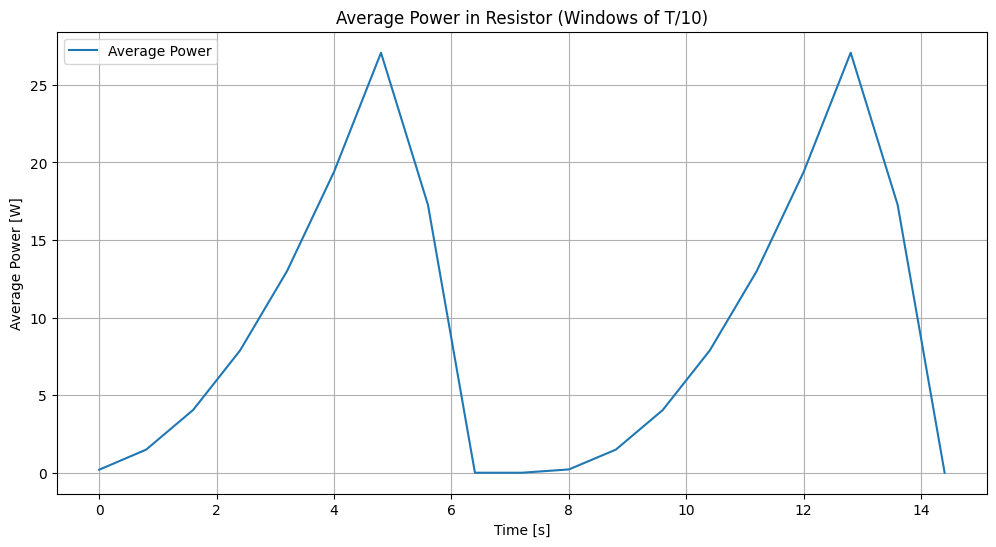

In [2]:
import matplotlib.pyplot as plt
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *
import numpy as np

# Create a new circuit
circuit = Circuit('Pulse Current Waveform')

# Define the pulse current source
pulse_current = circuit.PulseCurrentSource('pulse', 'n1', circuit.gnd, 
                                            initial_value=0@u_A,       # Start at 0A
                                            pulsed_value=-7@u_A,       # Peak at 6A
                                            delay_time=0@u_s,          # No delay
                                            rise_time=7@u_s,           # Rise time to peak (create slope)
                                            fall_time=0@u_s,         # Sharp fall after peak
                                            pulse_width=-1@u_s,         # Width of the top of the pulse
                                            period=8@u_s)              # Repeat after 8 seconds

# Define a resistor to complete the circuit
circuit.R(1, 'n1', circuit.gnd, 1@u_Ω)  # Resistor value is 1 ohm

# Simulate the circuit
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=0.01@u_s, end_time=15@u_s)

# Extract data and convert to base units
time = np.array(analysis.time)
voltage = np.array(analysis['n1'])

# Calculate current through the resistor
current = voltage / 1  # Assuming the resistor is 1 ohm

# Calculate power in the resistor
power = current**2 * 1  # Assuming the resistor is 1 ohm

# Define window size and calculate average power for each window
window_size = (8@u_s / 10) # Window size is T/10
average_powers = []
window_starts = np.arange(0, time[-1], window_size)
for start in window_starts:
    end = start + window_size
    indices = np.where((time >= start) & (time < end))[0]
    if indices.size > 0:  # Make sure there are points in the window
        average_powers.append(np.mean(power[indices]))

# Plot the average power
plt.figure(figsize=(12, 6))
plt.plot(window_starts, average_powers, label='Average Power')
plt.xlabel('Time [s]')
plt.ylabel('Average Power [W]')
plt.title('Average Power in Resistor (Windows of T/10)')
plt.grid(True)
plt.legend()
plt.show()


### **Analyze the diagram of average power in window of length T/10 :** 

The plot shows the periodic nature of the power dissipation in the resistor, with peaks corresponding to the pulse peaks and valleys corresponding to the intervals between pulses. The averaging over windows smooths out the instantaneous power variations, giving a clearer picture of the power trend over time.




## **Conclusion :**
  In this project, the concept of average power in electric circuits was discussed and its value was calculated for a circuit with a given current. Then, using the PySpice library, the current diagram was drawn. Then, how to change the shape of the current diagram in terms of time by adding the components of an RC circuit was investigated and it was observed that the resistance will not affect the shape of the diagram because the current source worked independently of the resistance, but the addition of the capacitor causes the diagram to change.We see less sudden changes and the corners of the graph will be smoother.After that, the graph of power as a function of time was drwan for resistor, current source and capacitor and we analyze each diagram.At the end, the average power after windows of length T/10 was examined and its graph was drawn

## **Sources:**  
- [https://phys.libretexts.org/Bookshelves/University_Physics/University_Physics_%28OpenStax%29/University_Physics_II_-_Thermodynamics_Electricity_and_Magnetism_%28OpenStax%29/15%3A_Alternating-Current_Circuits/15.05%3A_Power_in_an_AC_Circuit](URL)  


- [https://www.electronics-tutorials.ws/accircuits/power-in-ac-circuits.html](URL)  

- [youtube.com/watch?v=rL8l4xZ6EL0&list=PL6JL9fVjrZLcqixnvq9wUpG1xNGrIRH8j&index=13&t=298s](URL)  

- [https://pyspice.fabrice-salvaire.fr/releases/v1.4/api/PySpice/Spice/HighLevelElement.html](URL)  

- [https://www.allaboutcircuits.com/textbook/direct-current/chpt-2/voltage-current-resistance-relate/](URL)  

- [https://unacademy.com/content/neet-ug/study-material/physics/what-is-average-power/#:~:text=Average%20power%20formula%20is%20P,commonly%20known%20as%20power%20only.](URL)  

- [https://www.nagwa.com/en/explainers/346195931847/#:~:text=The%20power%20of%20an%20electric,%3A%20%F0%9D%91%83%20%3D%20%F0%9D%90%BC%20%C3%97%20%F0%9D%91%89%20.](URL)  

- [https://eepower.com/technical-articles/the-fundamentals-of-capacitors-in-ac-circuits/](URL)